# Example run: Transport iteratively all sources from target2_moa into source 2 and visualize result with use_pca = True for 50 epochs

In [31]:
import torch
import scanpy as sc
import numpy as np
import random

import sys
sys.path.append('/dss/dsshome1/0F/di93quv/OT-CFM/src/')

from ot_cfm.data_utils import load_adata, create_training_dataloader, create_dataloader
from ot_cfm.model import create_ot_cfm_model
from ot_cfm.training import train_cfm, save_ot_cfm_model, load_ot_cfm_model, create_ot_cfm_optimizer
from ot_cfm.transport import transport
from torchcfm.conditional_flow_matching import ExactOptimalTransportConditionalFlowMatcher

In [5]:
!pwd

/dss/dsshome1/0F/di93quv/OT-CFM/notebooks


In [17]:
# Set up device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [19]:
# Load target2_moa dataset
target2_moa = load_adata("../data/Tim_target2_wellres_featuresimputed_druginfoadded_pycytominer.h5ad")

In [20]:
target2_moa

AnnData object with n_obs × n_vars = 50640 × 591
    obs: 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_Batch', 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_InChIKey_standardized', 'Metadata_SMILES_standardized', 'Metadata_InChI_standardized', 'Metadata_pubchem_cid', 'Metadata_pert_iname', 'Metadata_clinical_phase', 'Metadata_target', 'Metadata_disease_area', 'Metadata_indication', 'Metadata_moa', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [21]:
# Initialize OT-CFM components
ot_cfm_model = create_ot_cfm_model(adata=target2_moa, use_pca=True)
ot_cfm_optimizer = create_ot_cfm_optimizer(ot_cfm_model)

In [24]:
# Train and transport iteratively
FM = ExactOptimalTransportConditionalFlowMatcher(sigma=0.1)
translated_sources = []

In [27]:
!pwd

/dss/dsshome1/0F/di93quv/OT-CFM/notebooks


100%|██████████| 200/200 [01:01<00:00,  3.28it/s]


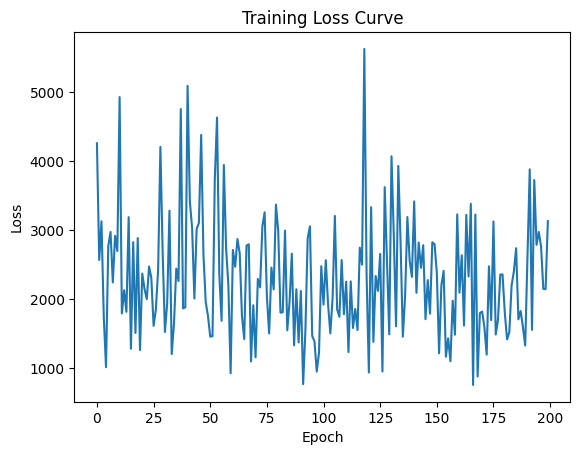

100%|██████████| 200/200 [01:00<00:00,  3.32it/s]


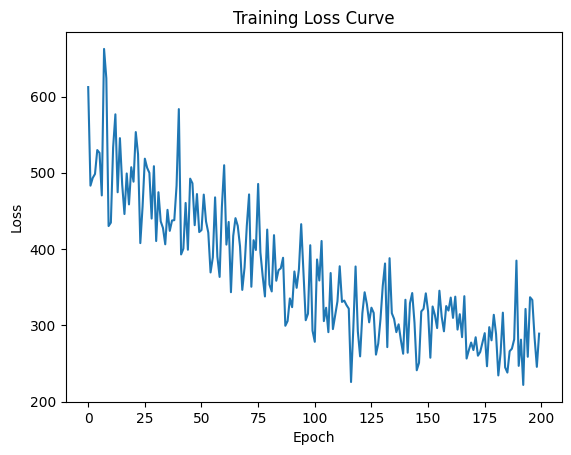

100%|██████████| 200/200 [00:49<00:00,  4.07it/s]


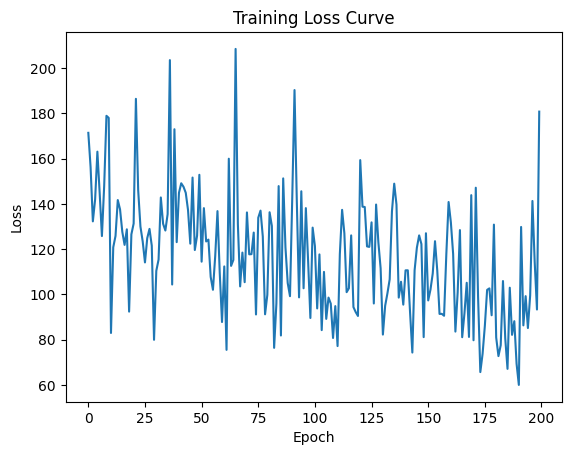

100%|██████████| 200/200 [01:22<00:00,  2.42it/s]


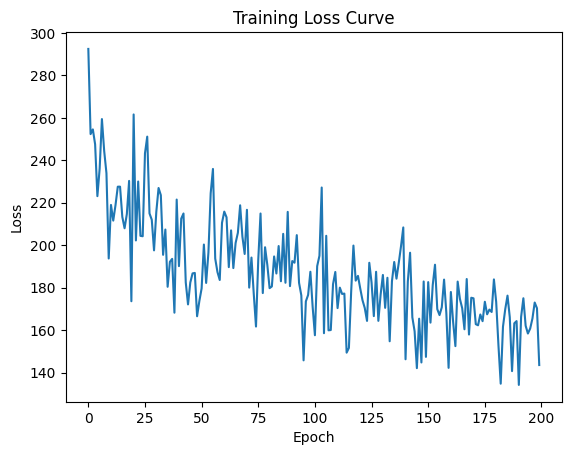

100%|██████████| 200/200 [01:38<00:00,  2.03it/s]


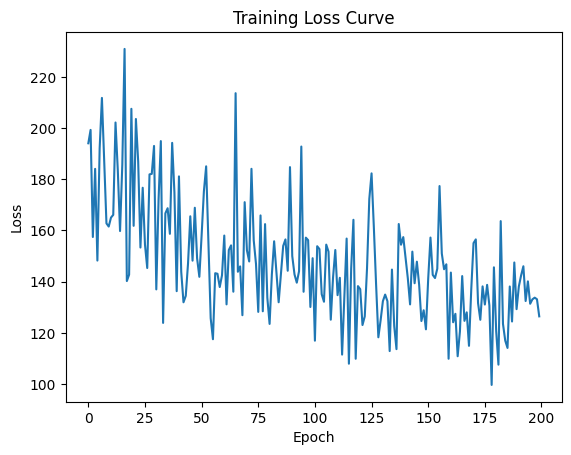

100%|██████████| 200/200 [01:25<00:00,  2.34it/s]


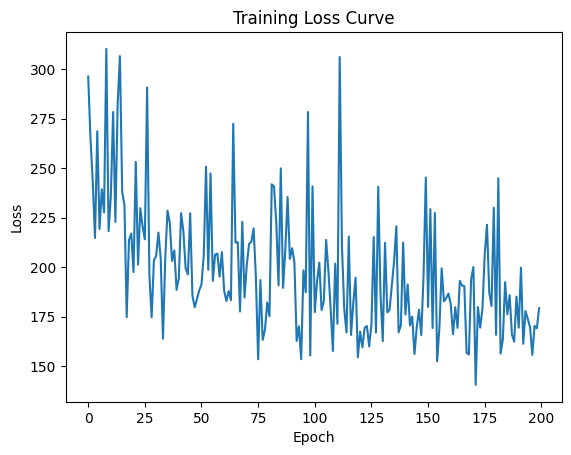

100%|██████████| 200/200 [01:29<00:00,  2.22it/s]


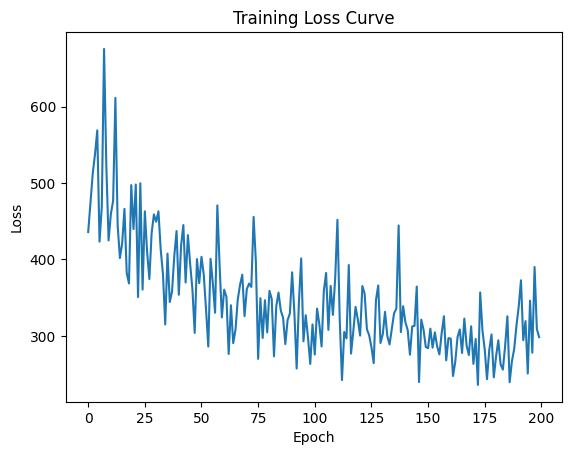

100%|██████████| 200/200 [00:59<00:00,  3.37it/s]


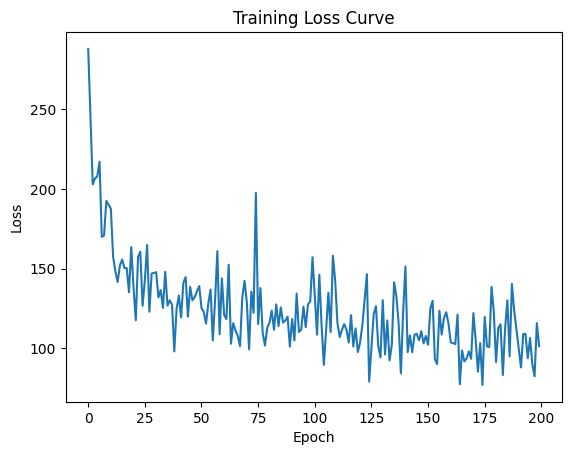

100%|██████████| 200/200 [00:37<00:00,  5.33it/s]


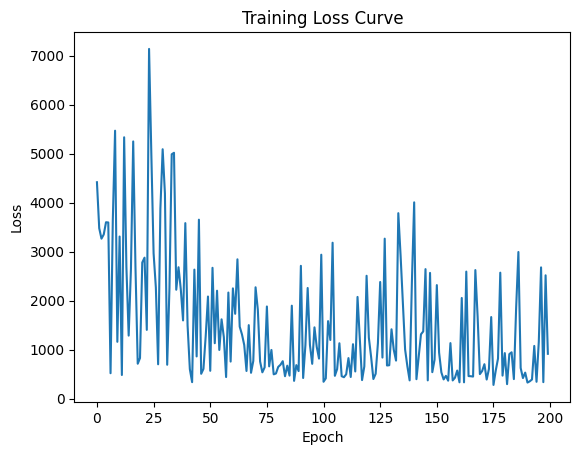

In [28]:
# Train and save OT-CFM models for each source
for source in target2_moa.obs["Metadata_Source"].unique():
    if source == "source_2":
        continue

    source_data = target2_moa[target2_moa.obs["Metadata_Source"] == source].copy()
    dataloader = create_training_dataloader(target2_moa, source, "source_2", batch_size=64, use_pca=True)
    trained_ot_cfm_model = train_cfm(ot_cfm_model, ot_cfm_optimizer, FM, dataloader, epochs=200, plot_loss=True)
    save_ot_cfm_model(ot_cfm_model, ot_cfm_optimizer, f"../data/saved_models/ot_cfm_{source}_to_source_2.pt")

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

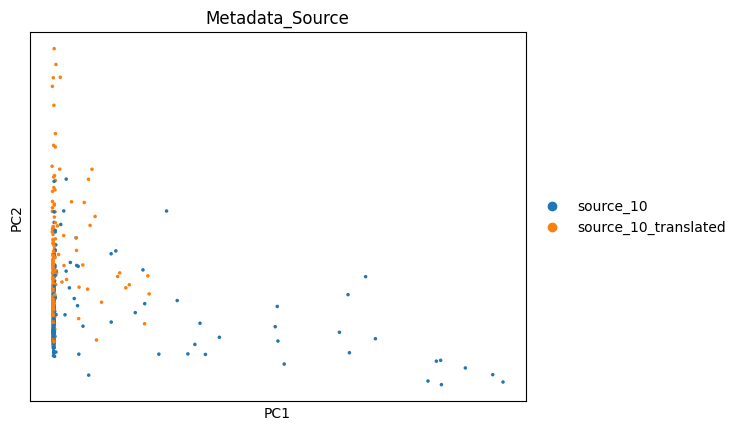

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

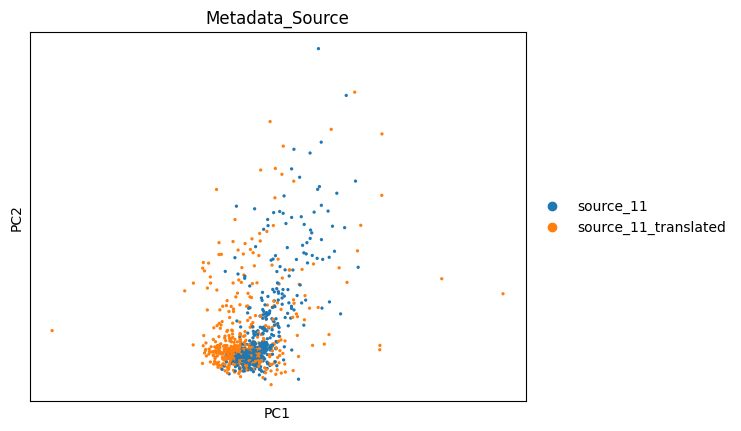

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

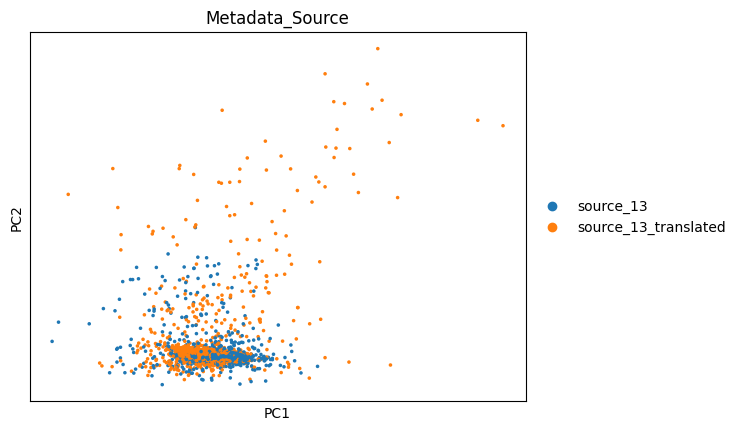

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

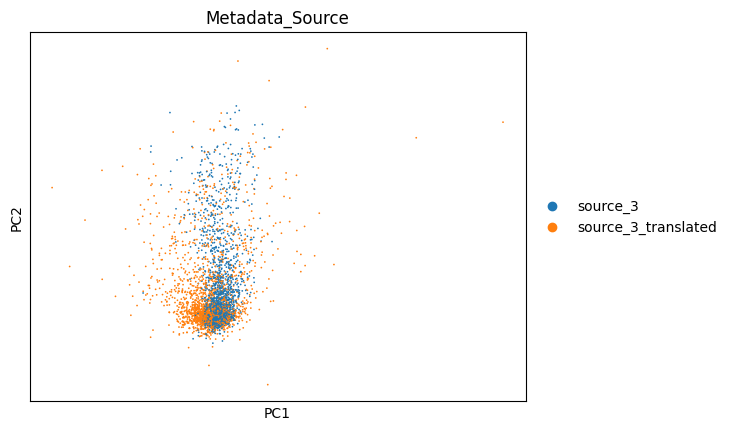

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

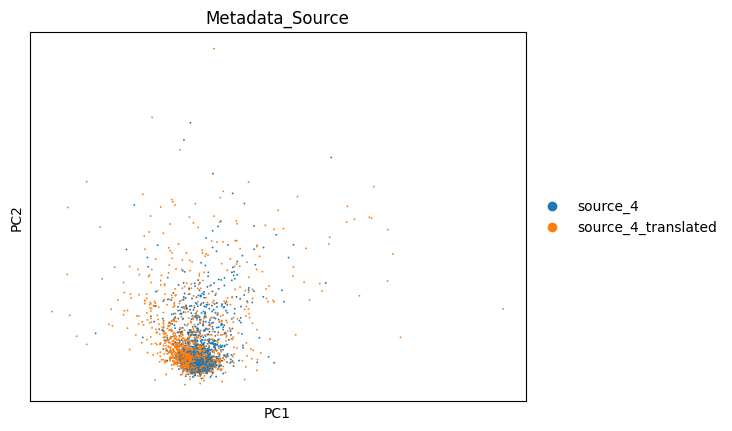

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

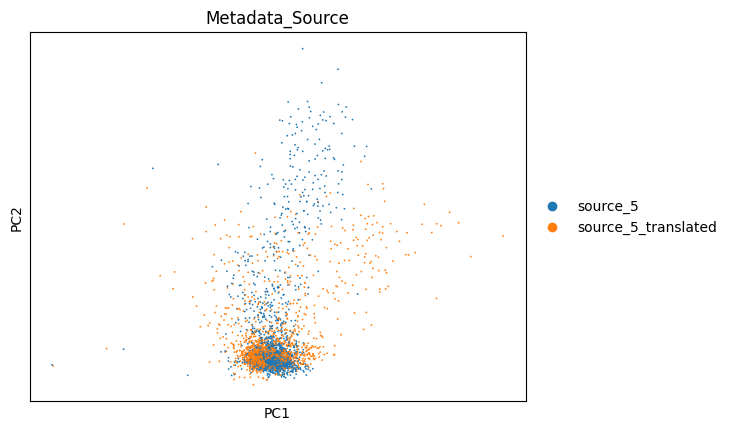

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

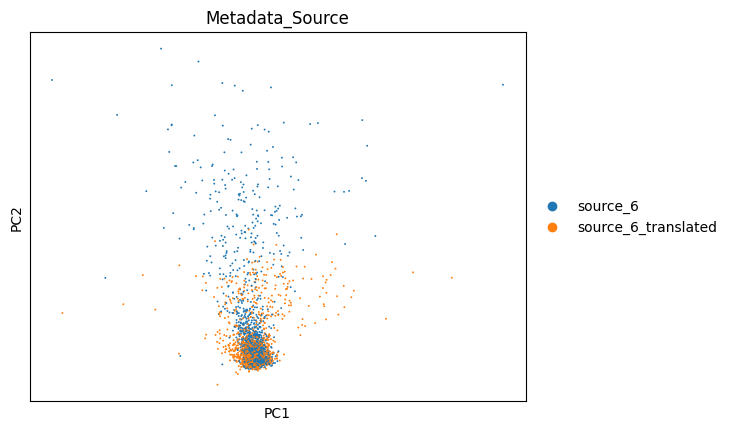

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

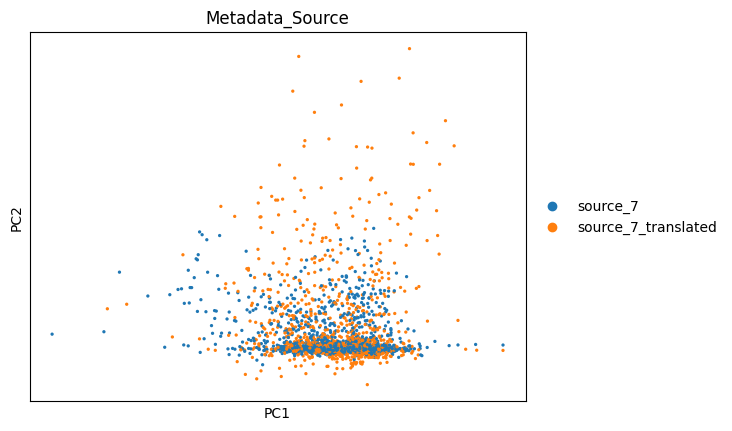

/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cpd = self.cpds[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  microscope = self.microscope[idx]
/dss/dsshome1/0F/di93quv/OT-CFM/src/ot_cfm/data_utils.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  
/usr/local/lib/python3.10/dist-packages/anndata/_core/annda

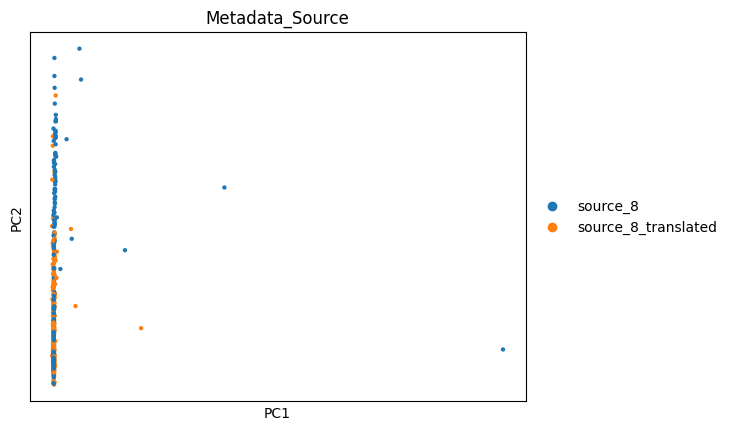

In [34]:
# Load and perform transport
for source in target2_moa.obs["Metadata_Source"].unique():
    if source == "source_2":
        continue

    dataloader = create_dataloader(target2_moa, source, batch_size=64, use_pca=True)
    load_ot_cfm_model(ot_cfm_model, ot_cfm_optimizer, f"../data/saved_models/ot_cfm_{source}_to_source_2.pt")
    translated_source_adata = transport(dataloader, ot_cfm_model, x1_label=source, device=device)
    translated_sources.append(translated_source_adata)
    sc.pl.pca(translated_source_adata, color="Metadata_Source")

In [35]:
# Combine all translated sources with source_2
all_sources_adata = sc.concat(translated_sources, axis=0)
source_2_data = target2_moa[target2_moa.obs["Metadata_Source"] == "source_2"].copy()
all_sources_adata = sc.concat([all_sources_adata, source_2_data], join="outer")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


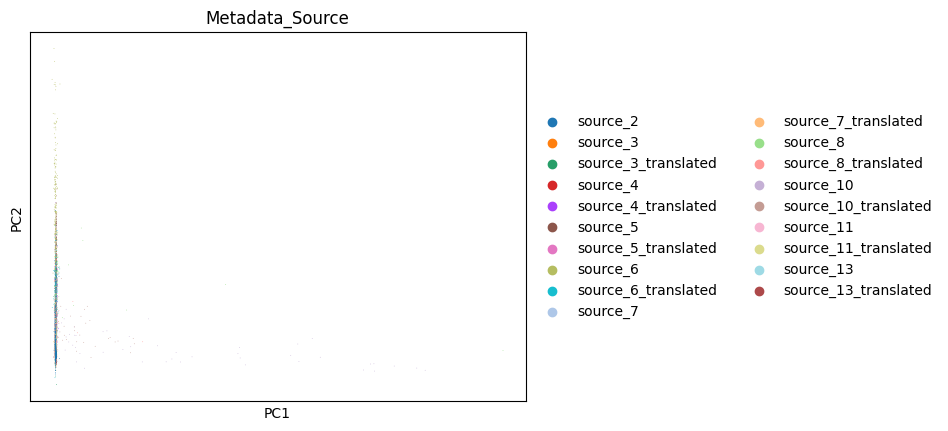

In [36]:
# Plot combined PCA and save
sc.pl.pca(all_sources_adata, color="Metadata_Source")
#all_sources_adata.write('./outputs/run_3_final_adata_target2_moa_reconstructed_all_sources_OT_CFM.h5ad')

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


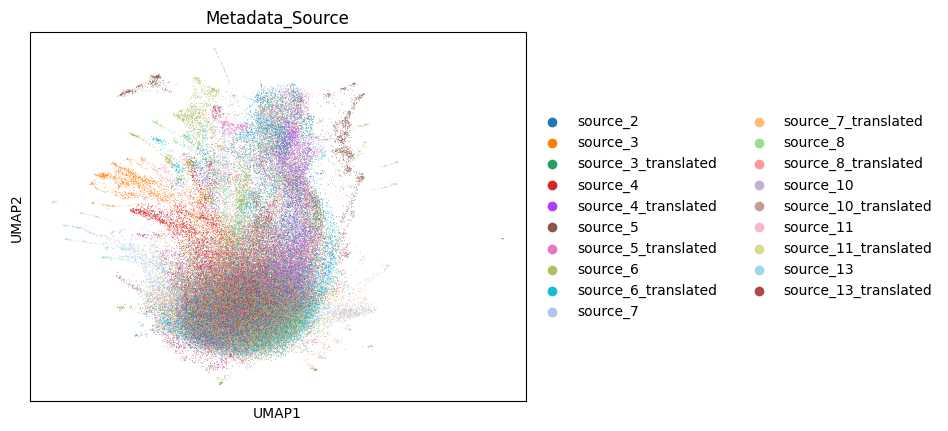

In [38]:
# UMAP
sc.pp.neighbors(all_sources_adata, use_rep="X_pca")
sc.tl.umap(all_sources_adata)
sc.pl.umap(all_sources_adata, color="Metadata_Source")